## Load the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

## Import the Data

In [3]:
# paths for the three dfs

df_jan_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\yellow_tripdata_2016-01.csv"
df_feb_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\yellow_tripdata_2016-02.csv"
df_mar_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])


In [4]:
df_jan

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=26,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [7]:
df_final = dd.concat([df_jan, df_feb, df_mar], axis=0)

**New york bounding box:**
- min_latitude = 40.60
- max_latitude = 40.85
- min_longitude = -74.05
- max_longitude = -73.70

In [8]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70

In [9]:
# fare amount column
fare_amount = df_final['fare_amount'].compute()

# trip distance column
trip_distance = df_final['trip_distance'].compute()

In [11]:
fare_amount.shape[0] / 10000000

3.4499859

In [12]:
# percentile values for fare amount

percentile_values = np.arange(0.991,1.000, 0.001)
percentile_values

fare_amount.quantile(percentile_values)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

In [13]:
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare_amount_val = 0.5

print(min_fare_amount_val)
print(max_fare_amount_val)

0.5
81.0


In [14]:
trip_distance.quantile(percentile_values)

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

In [17]:
# percentile values for trip_distance

min_trip_distance_val = 0.25
max_trip_distance_val = trip_distance.quantile(percentile_values).iloc[-2].item()

print(min_trip_distance_val)
print(max_trip_distance_val)

0.25
24.43


## Remove Outilers from the Data

In [18]:
# select data points within the given ranges

df_final = df_final.loc[(df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) & 
(df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [20]:
df_final = df_final.loc[(df_final['fare_amount'].between(min_fare_amount_val, max_fare_amount_val, inclusive='both')) &
 (df_final['trip_distance'].between(min_trip_distance_val, max_trip_distance_val, inclusive='both'))]

## Location Based Columns

In [22]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude', 
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


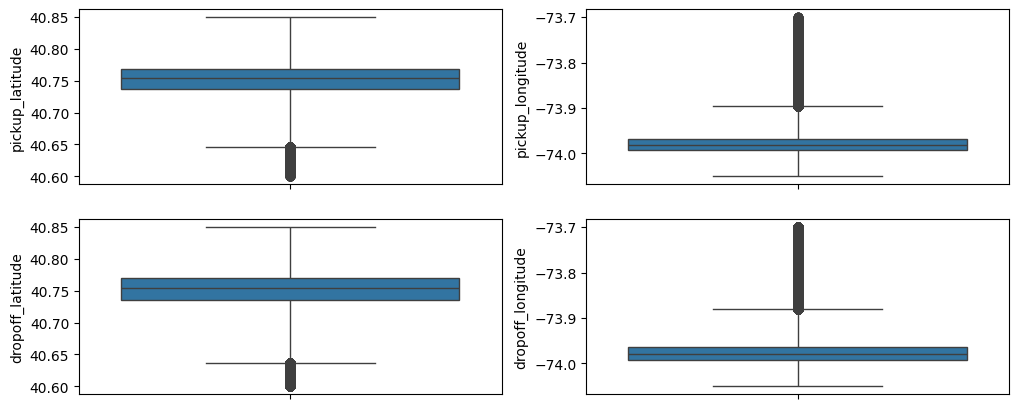

In [23]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i],whis=3)
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2],whis=3)

**whis** controls outlier detection by adjusting whisker length.
- Higher values (e.g., 3, 5) → Fewer outliers.
- Lower values (e.g., 1) → More outliers.

### IQR = Q3 - Q1
- Lower Limit=Q1−(whis×IQR)
- Upper Limit=Q3+(whis×IQR)

## Trip Distance

<Axes: ylabel='trip_distance'>

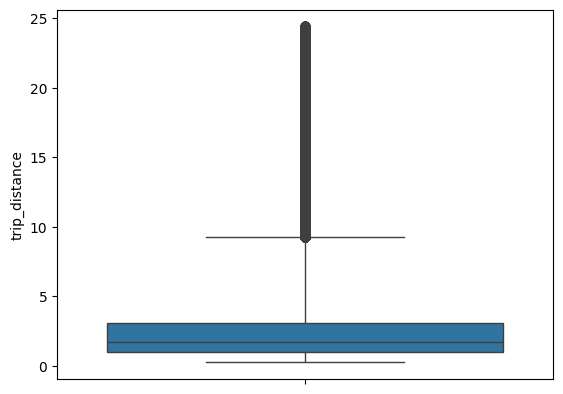

In [24]:
# boxplot for the trip distance

sns.boxplot(df_final.loc[:,"trip_distance"].compute(), whis=3)

## Fare Amount

<Axes: ylabel='fare_amount'>

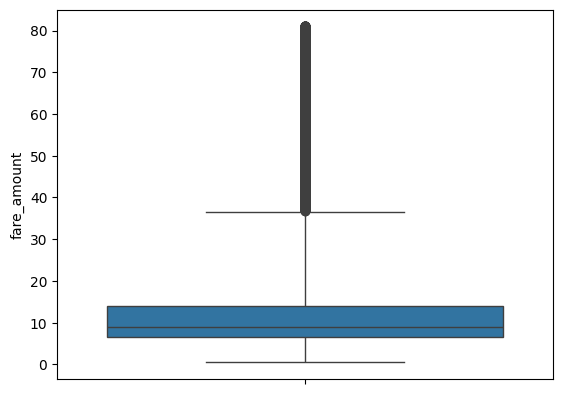

In [27]:
# boxplot for the fare amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute(), whis=3)

In [28]:
save_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\location_data.csv"

pickup_coord_dataset = df_final.loc[:, ['pickup_latitude','pickup_longitude']]

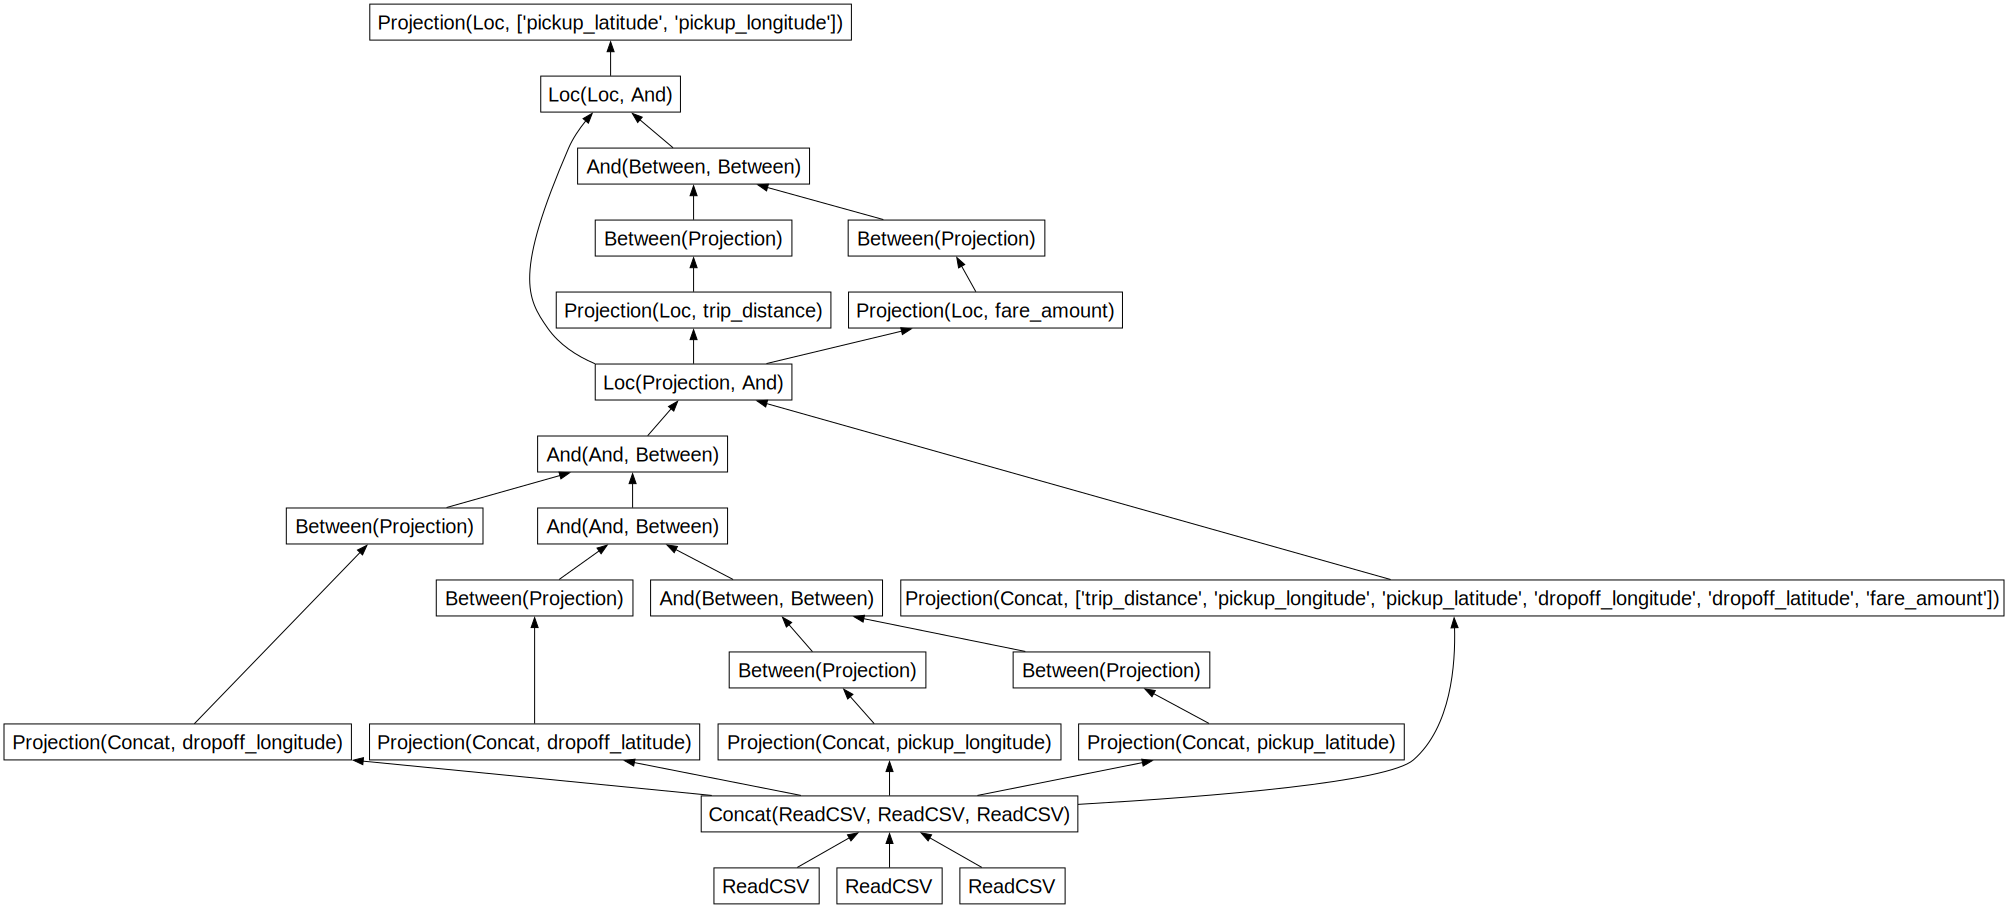

In [29]:
pickup_coord_dataset.visualize()

In [30]:

# form the dataset

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']].compute()

print("Shape of the dataset is ", pickup_coord_dataset.shape)

Shape of the dataset is  (33234199, 2)


In [31]:
pickup_coord_dataset

,pickup_latitude,pickup_longitude
0,40.734695,-73.990372
1,40.729912,-73.980782
2,40.679565,-73.984550
3,40.718990,-73.993469
4,40.781330,-73.960625
...,...,...
420269,40.644451,-73.790565
420270,40.641483,-73.788055
420271,40.646736,-73.789154
420273,40.774471,-73.977356


In [32]:
# save the dataset

pickup_coord_dataset.to_csv(save_path, index=False)